In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import time
from sklearn.model_selection import train_test_split
import xgboost as xgb
import random
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (30,10)
import numpy as np 
import pandas as pd 
from xgboost import plot_importance
import xgboost as xg 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error as MSE 

In [3]:
df_train=pd.read_csv("drive/MyDrive/Datasets-Collab/competitive-data-science-predict-future-sales/sales_train.csv")
df_test=pd.read_csv("drive/MyDrive/Datasets-Collab/competitive-data-science-predict-future-sales/test.csv")
shop=pd.read_csv("drive/MyDrive/Datasets-Collab/competitive-data-science-predict-future-sales/shops.csv")
items=pd.read_csv("drive/MyDrive/Datasets-Collab/competitive-data-science-predict-future-sales/items.csv")
item_categories=pd.read_csv("drive/MyDrive/Datasets-Collab/competitive-data-science-predict-future-sales/item_categories.csv")

In [4]:
df_train["date"]=pd.to_datetime(df_train["date"],format='%d.%m.%Y')
df_train['day']=df_train['date'].dt.day
df_train['month']=df_train['date'].dt.month
df_train['year']=df_train['date'].dt.year
df_train=df_train.sort_values(by='date')
df_test['month']=11
df_test['year']=2015


In [5]:
df_train['item_cnt_day']=abs(df_train['item_cnt_day'])
not_in_train=set(list(np.sort(df_test['item_id'].unique()))) - set(list(np.sort(df_train['item_id'].unique())))
df_train.drop(df_train.loc[df_train.item_id==6066].index,axis=0,inplace=True)

##Concatenating train and test set

In [8]:
shop

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4
5,"Вологда ТРЦ ""Мармелад""",5
6,"Воронеж (Плехановская, 13)",6
7,"Воронеж ТРЦ ""Максимир""",7
8,"Воронеж ТРЦ Сити-Парк ""Град""",8
9,Выездная Торговля,9


In [6]:
df_train=pd.merge(df_train,items[['item_id','item_category_id']],on='item_id')
df_test=pd.merge(df_test,items[['item_id','item_category_id']],on='item_id')

In [7]:
df_train.head(2)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,day,month,year,item_category_id
0,2013-01-01,0,18,5823,2500.0,1.0,1,1,2013,35
1,2013-01-01,0,54,5823,2499.5,1.0,1,1,2013,35


In [ ]:
#sns.barplot(x=df_train['item_category_id'],y=df_train['item_price'])

In [ ]:
df_train=df_train.groupby(['date_block_num','year','month','shop_id','item_id','item_category_id']).agg({'item_price': 'mean', 
                                                                   'item_cnt_day': 'sum'
                                                                  }).reset_index()

In [ ]:
df_train['High_sale_month']=0
df_train.loc[(df_train['month']>=9),'High_sale_month']=1

In [ ]:
df_train.head(10)

,date_block_num,year,month,shop_id,item_id,item_category_id,item_price,item_cnt_day,High_sale_month
0,0,2013,1,0,32,40,221.0,6.0,0
1,0,2013,1,0,33,37,347.0,3.0,0
2,0,2013,1,0,35,40,247.0,1.0,0
3,0,2013,1,0,43,40,221.0,1.0,0
4,0,2013,1,0,51,57,128.5,2.0,0
5,0,2013,1,0,61,43,195.0,1.0,0
6,0,2013,1,0,75,40,76.0,1.0,0
7,0,2013,1,0,88,40,76.0,1.0,0
8,0,2013,1,0,95,40,193.0,1.0,0
9,0,2013,1,0,96,40,70.0,1.0,0


In [ ]:
np.sort(df_test.shop_id.unique())

array([ 2,  3,  4,  5,  6,  7, 10, 12, 14, 15, 16, 18, 19, 21, 22, 24, 25,
       26, 28, 31, 34, 35, 36, 37, 38, 39, 41, 42, 44, 45, 46, 47, 48, 49,
       50, 52, 53, 55, 56, 57, 58, 59])

In [ ]:
df_train.loc[df_train['shop_id']==9]['item_price'].describe()

count     1591.000000
mean      1332.209174
std       1512.529776
min         90.000000
25%        699.000000
50%        999.000000
75%       1599.000000
max      27499.000000
Name: item_price, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


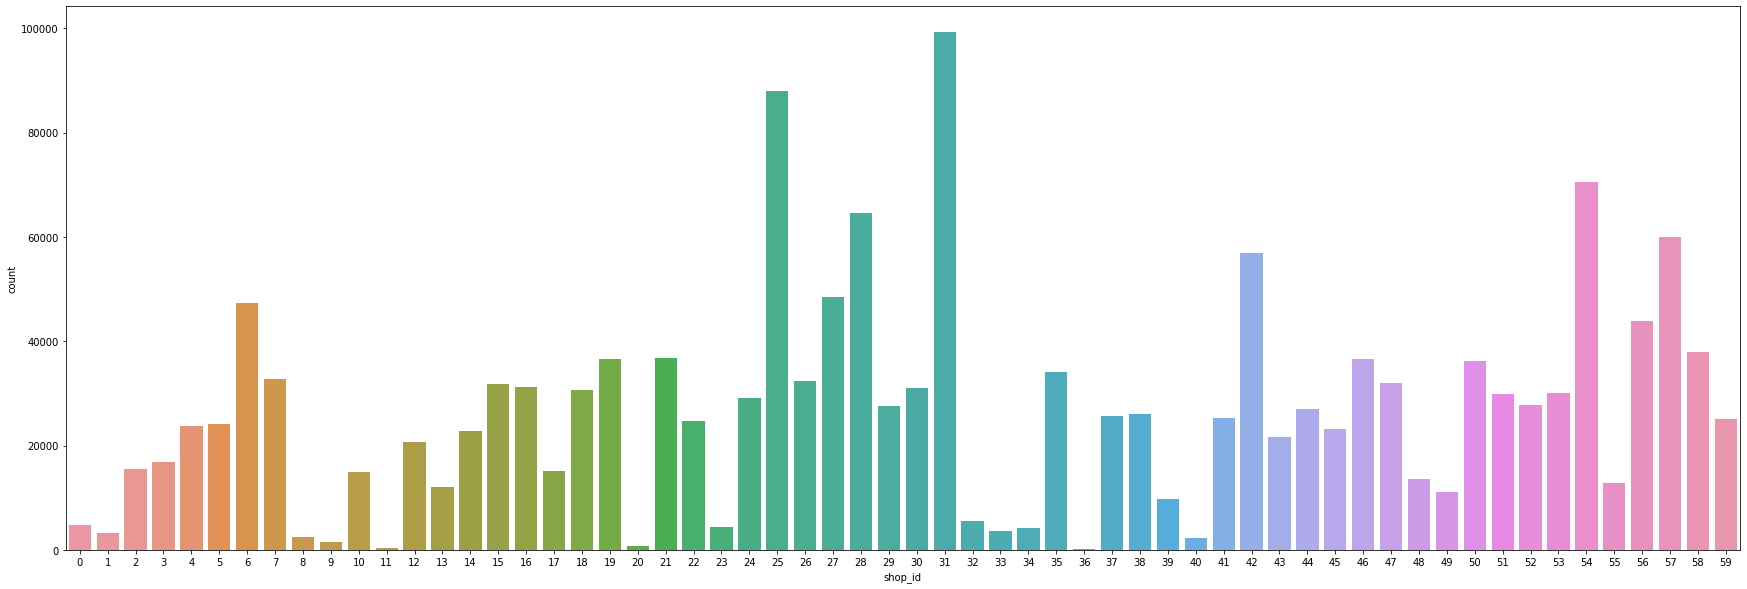

In [ ]:
sns.countplot(df_train['shop_id'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


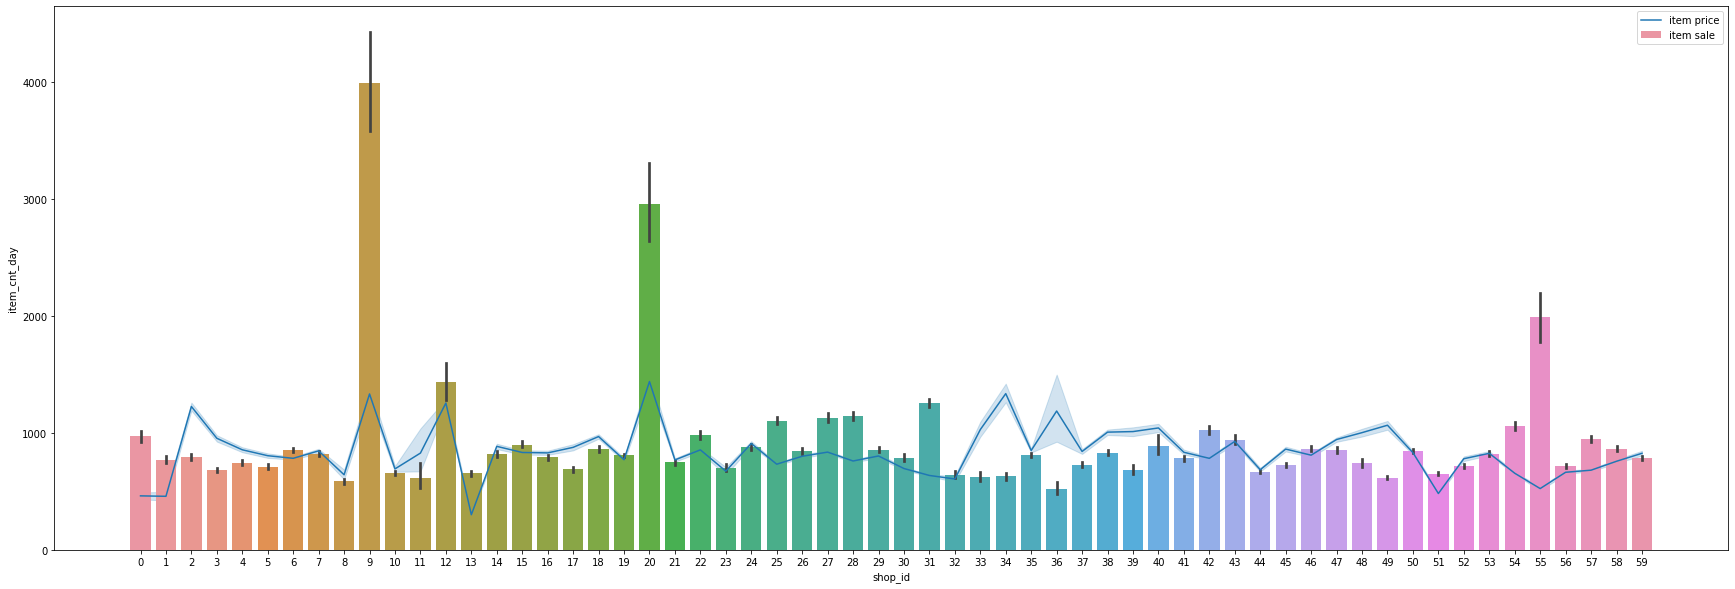

In [ ]:
sns.barplot(df_train['shop_id'],df_train['item_cnt_day']*400,label='item sale')
sns.lineplot(df_train['shop_id'],df_train['item_price'],label='item price')
sns.lineplot()
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


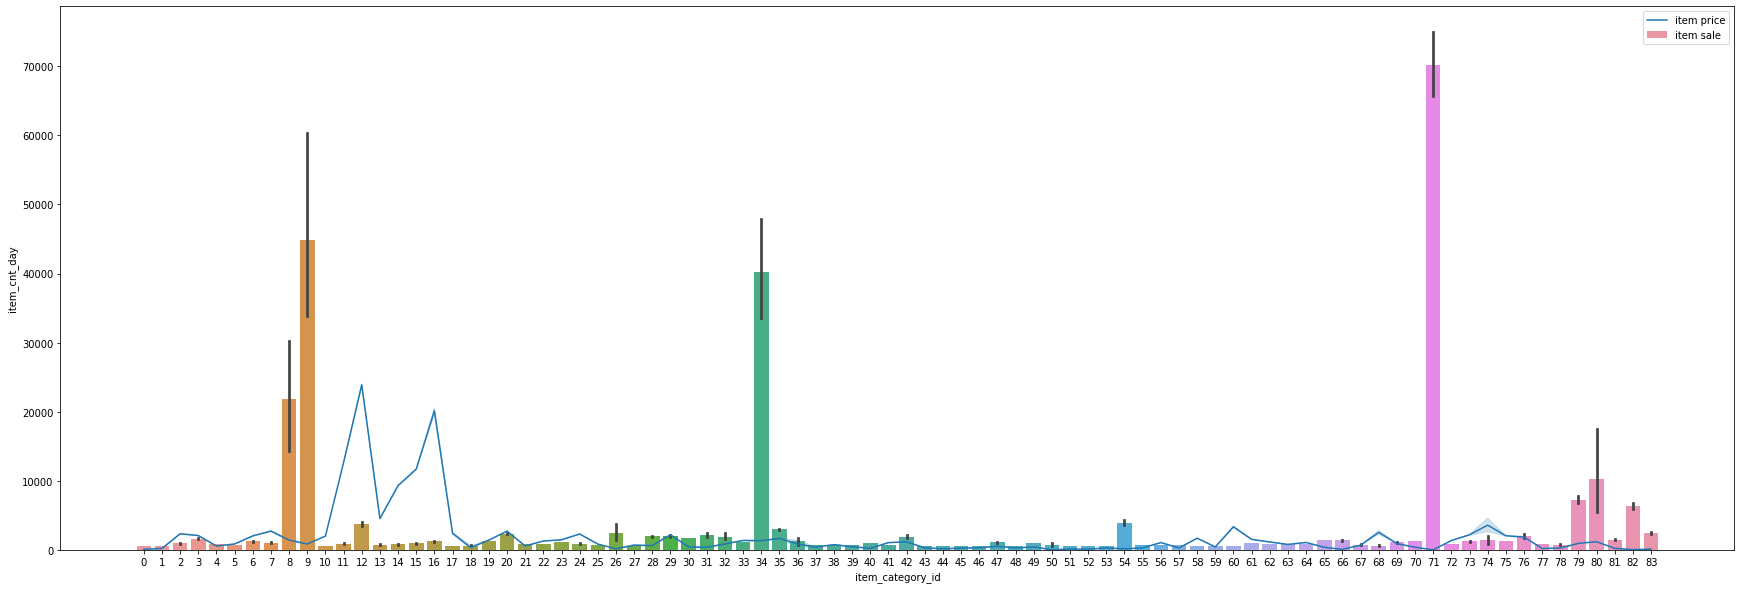

In [ ]:
sns.barplot(df_train['item_category_id'],df_train['item_cnt_day']*500,label='item sale')
sns.lineplot(df_train['item_category_id'],df_train['item_price'],label='item price')
sns.lineplot()
plt.legend()
plt.show()

In [ ]:
shop_ids=[9,20,55,33,34]
cat_ids=[71,12,34,8,9,60,68,74]

In [ ]:
df_train.loc[df_train['shop_id'].isin(shop_ids)]['item_category_id'].unique()

array([44, 76, 54, 31, 78, 19, 23, 32, 28, 30, 22, 25, 15, 67,  2, 35, 62,
       29, 11,  6, 33, 65, 41, 70, 38, 72,  3, 14, 61, 69, 63, 64, 37, 40,
       71, 34, 55, 75, 49, 83, 73, 20, 21, 12, 17, 79, 58, 24,  5,  4,  8,
        7, 43, 16, 74, 56, 27, 26, 42, 80, 47, 36])

In [ ]:
df_train.loc[df_train['item_category_id']==71].sort_values('item_cnt_day',ascending=False).head(30)

,date_block_num,year,month,shop_id,item_id,item_category_id,item_price,item_cnt_day,High_sale_month
657942,11,2013,12,31,20949,71,4.998710,1305.0,1
1226813,23,2014,12,31,20949,71,5.000000,1209.0,1
645158,11,2013,12,25,20949,71,5.000000,1066.0,1
1261076,24,2015,1,12,20949,71,4.000000,1000.0,0
1216308,23,2014,12,25,20949,71,4.999769,997.0,1
598233,10,2013,11,31,20949,71,4.998413,989.0,1
547503,9,2013,10,31,20949,71,5.000000,978.0,1
495702,8,2013,9,31,20949,71,5.000000,950.0,1
767443,13,2014,2,31,20949,71,5.000000,941.0,0
716727,12,2014,1,31,20949,71,5.000000,899.0,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


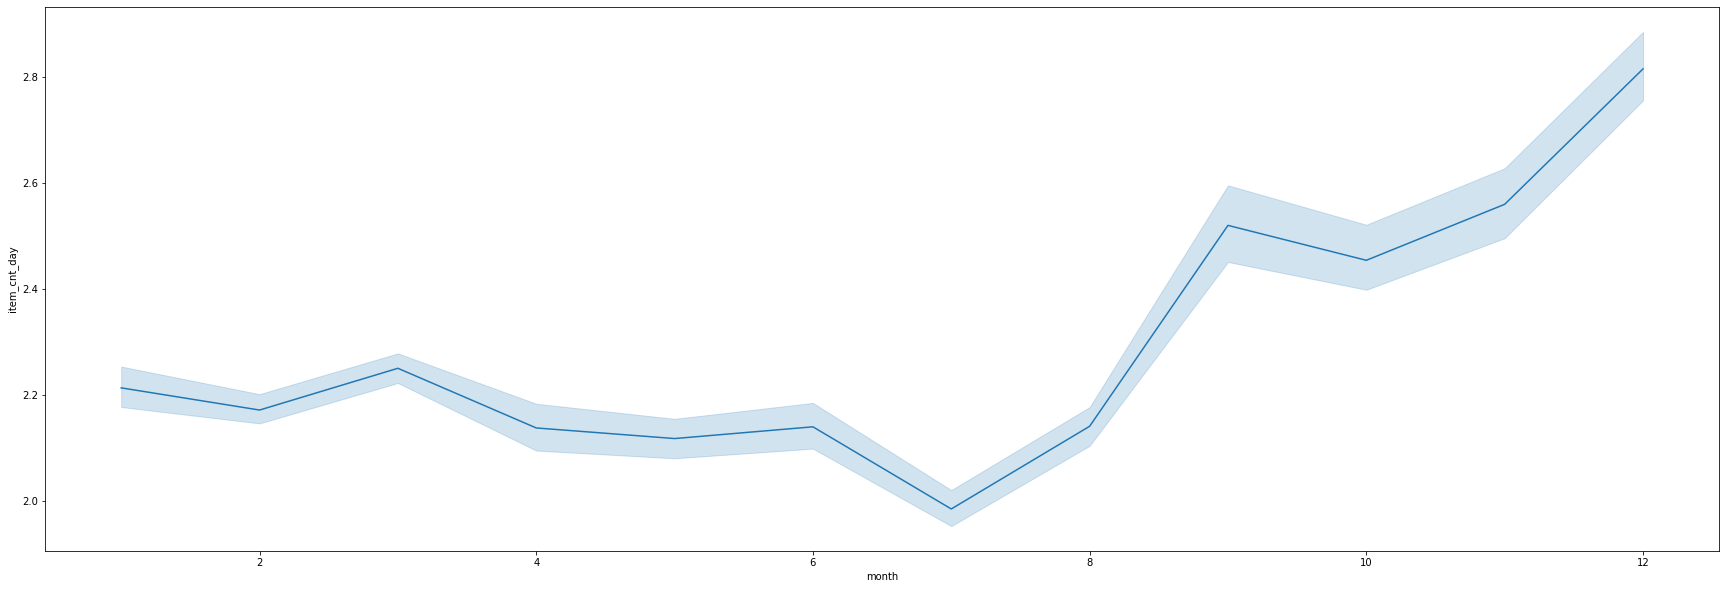

In [ ]:
sns.lineplot(df_train['month'],df_train['item_cnt_day'])

In [ ]:
temp= df_train.groupby(['year','month'])['item_cnt_day'].mean().reset_index(name='count')


In [ ]:
temp.sort_values(['count'],ascending=False)

,year,count
0,2013,1569060.0
1,2014,1326299.0
2,2015,767928.0


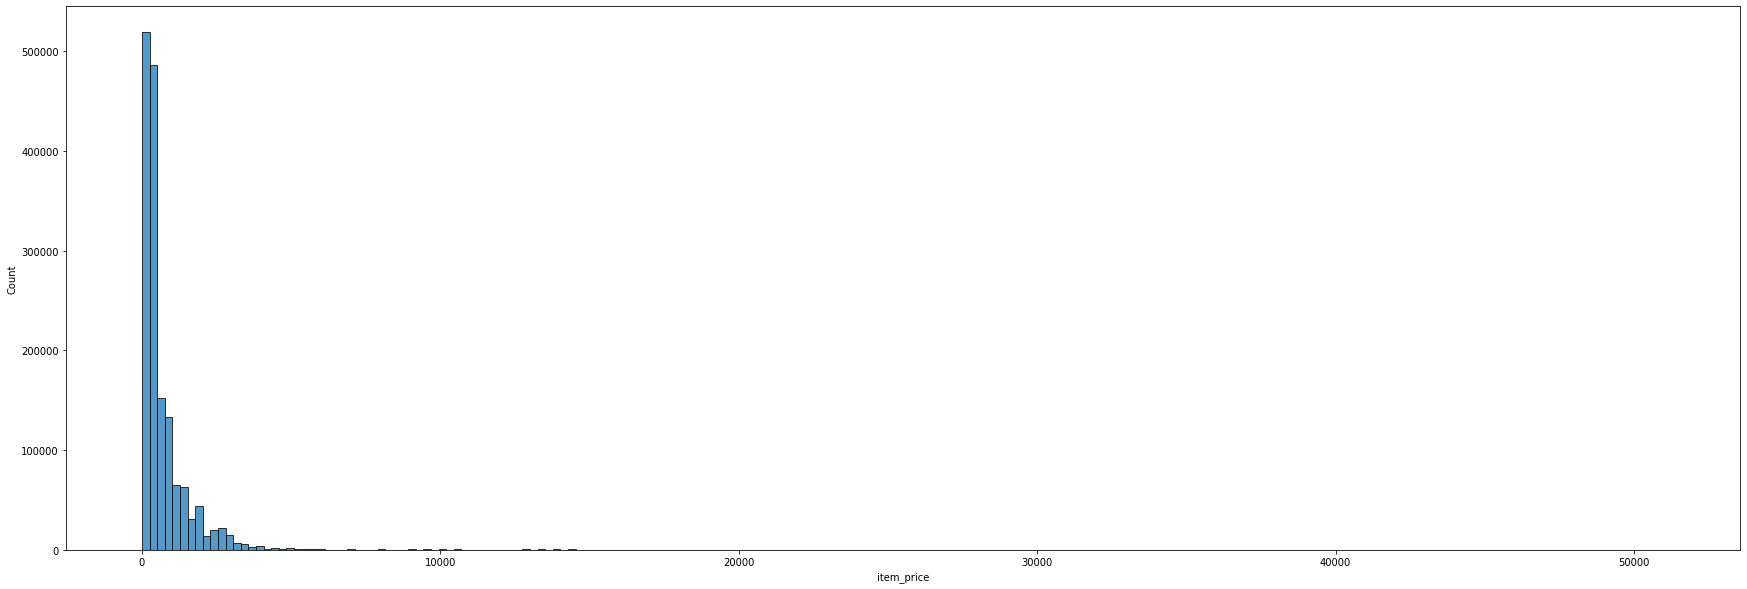

In [ ]:
sns.histplot(df_train['item_price'],bins=200)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


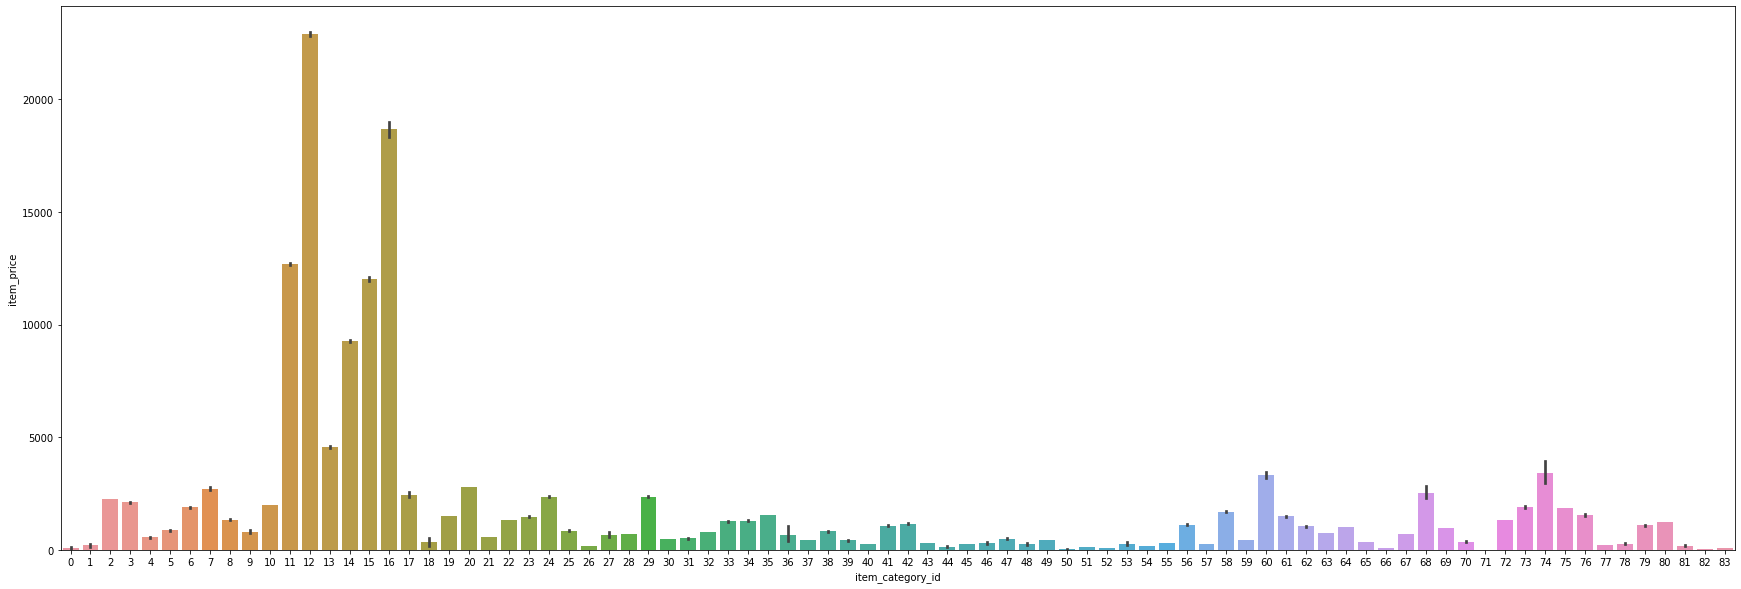

In [ ]:
df_train.loc[df_train['item_price']>20000]['item_cnt_day'].value_counts()

1.0     5508
2.0      830
3.0      209
4.0       87
5.0       45
6.0       26
7.0       21
10.0      15
8.0        6
13.0       5
11.0       5
9.0        5
16.0       5
12.0       4
28.0       2
20.0       1
52.0       1
17.0       1
18.0       1
15.0       1
14.0       1
21.0       1
Name: item_cnt_day, dtype: int64

In [ ]:
df_train.loc[df_train['item_category_id']==75]['item_price'].mean()

1852.6814922114108

In [ ]:
df_train.loc[df_train['item_cnt_day']==5].shape[0]/df_train.shape[0]*100

0.3568985860303394

In [ ]:
check1=df_train.loc[(df_train['item_cnt_day']!=2) & (df_train['item_cnt_day']!=1)].sort_values('item_id')

In [ ]:
df_train['item_id'].nunique()

21807

In [ ]:
l1= list(check1['item_id'].unique())

In [ ]:
len(l1)

6161

In [ ]:
check2=df_train.loc[(df_train['item_cnt_day']==2) | (df_train['item_cnt_day']==1)].sort_values('item_id')

In [ ]:
l2=list(check2['item_id'].unique())

In [ ]:
l3=list(set(l1)-set(l2))

In [ ]:
df_train['item_price'].describe().apply(lambda x: format(x, 'f'))

count    2935849.000000
mean         890.853233
std         1729.799631
min           -1.000000
25%          249.000000
50%          399.000000
75%          999.000000
max       307980.000000
Name: item_price, dtype: object

In [ ]:
df_train.loc[df_train['item_category_id']==76]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,day,month,year,item_category_id
1519115,2013-05-01,4,55,1162,755.0,1.0,1,5,2013,76
1519116,2013-05-04,4,55,1162,755.0,1.0,4,5,2013,76
1519117,2013-05-08,4,55,1162,755.0,1.0,8,5,2013,76
1519118,2013-05-09,4,55,1162,755.0,1.0,9,5,2013,76
1519119,2013-05-15,4,55,1162,755.0,1.0,15,5,2013,76
...,...,...,...,...,...,...,...,...,...,...
2935470,2015-10-25,33,55,4945,1393.0,1.0,25,10,2015,76
2935471,2015-10-31,33,55,4945,1393.0,1.0,31,10,2015,76
2935623,2015-10-28,33,55,4914,903.0,1.0,28,10,2015,76
2935632,2015-10-28,33,55,12733,1490.0,1.0,28,10,2015,76


In [ ]:
df_train.loc[df_train['item_category_id']==31].describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day,day,month,year,item_category_id
count,20649.000000,20649.0,20649.000000,20649.000000,20649.000000,20649.000000,20649.000000,20649.000000,20649.0
mean,19.981452,55.0,6642.439343,506.679556,1.700228,15.866289,6.776599,2014.183738,31.0
std,8.048122,0.0,4811.703993,503.268103,7.797293,8.888488,3.443365,0.736262,0.0
min,4.000000,55.0,501.000000,4.000000,-1.000000,1.000000,1.000000,2013.000000,31.0
25%,14.000000,55.0,2963.000000,149.000000,1.000000,8.000000,4.000000,2014.000000,31.0
50%,21.000000,55.0,5229.000000,349.000000,1.000000,16.000000,7.000000,2014.000000,31.0
75%,26.000000,55.0,9526.000000,599.000000,1.000000,24.000000,10.000000,2015.000000,31.0
max,33.000000,55.0,22165.000000,3599.000000,508.000000,31.000000,12.000000,2015.000000,31.0


In [ ]:
df_train.loc[df_train['item_category_id']==31]['shop_id']


1519186    55
1519187    55
1519188    55
1519189    55
1519190    55
           ..
2934531    55
2935442    55
2935634    55
2935635    55
2935844    55
Name: shop_id, Length: 20649, dtype: int64

In [ ]:
np.sort(df_test['item_category_id'].unique())

array([ 0,  2,  3,  5,  6,  7,  9, 11, 12, 15, 16, 19, 20, 21, 22, 23, 24,
       25, 26, 27, 28, 29, 30, 31, 33, 34, 35, 36, 37, 38, 40, 41, 42, 43,
       44, 45, 47, 49, 54, 55, 56, 57, 58, 60, 61, 62, 63, 64, 65, 67, 69,
       70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 83])

In [ ]:
df_train.loc[(df_train['item_category_id']==31) & (df_train['item_cnt_day']==31)]['item_id'].nunique()


3

In [ ]:
df_test.shape

(214200, 6)

In [ ]:
df_test.loc[df_test['item_category_id']==31].shape


(11634, 6)

In [ ]:
df_train['item_price'].corr(df_train['item_cnt_day'])

0.011196625252355609

In [ ]:
df_train[df_train['item_id'].isin(l3)].sort_values('item_category_id')

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,day,month,year,item_category_id
1201930,2013-01-30,0,12,11366,312.500000,4.0,30,1,2013,9
1748909,2013-08-23,7,42,13474,10398.000000,-1.0,23,8,2013,11
2258903,2014-03-07,14,51,6413,77.000000,4.0,7,3,2014,30
2766786,2015-01-11,24,55,4329,105.000000,7.0,11,1,2015,31
2773335,2015-01-29,24,55,3727,1999.000000,19.0,29,1,2015,31
2773336,2015-01-30,24,55,3727,1999.000000,21.0,30,1,2015,31
2773337,2015-01-31,24,55,3727,1999.000000,27.0,31,1,2015,31
2773338,2015-02-01,25,55,3727,1999.000000,7.0,1,2,2015,31
2831208,2015-04-01,27,55,3729,1999.000000,4.0,1,4,2015,31
2831209,2015-04-02,27,55,3729,1999.000000,5.0,2,4,2015,31


In [ ]:
df_train.groupby(['date_block_num'])['item_cnt_day'].sum()

date_block_num
0     131479.0
1     128090.0
2     147142.0
3     107190.0
4     106970.0
5     125381.0
6     116966.0
7     125291.0
8     133332.0
9     127541.0
10    130009.0
11    183342.0
12    116899.0
13    109687.0
14    115297.0
15     96556.0
16     97790.0
17     97429.0
18     91280.0
19    102721.0
20     99208.0
21    107422.0
22    117845.0
23    168755.0
24    110971.0
25     84198.0
26     82014.0
27     77827.0
28     72295.0
29     64114.0
30     63187.0
31     66079.0
32     72843.0
33     71056.0
Name: item_cnt_day, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


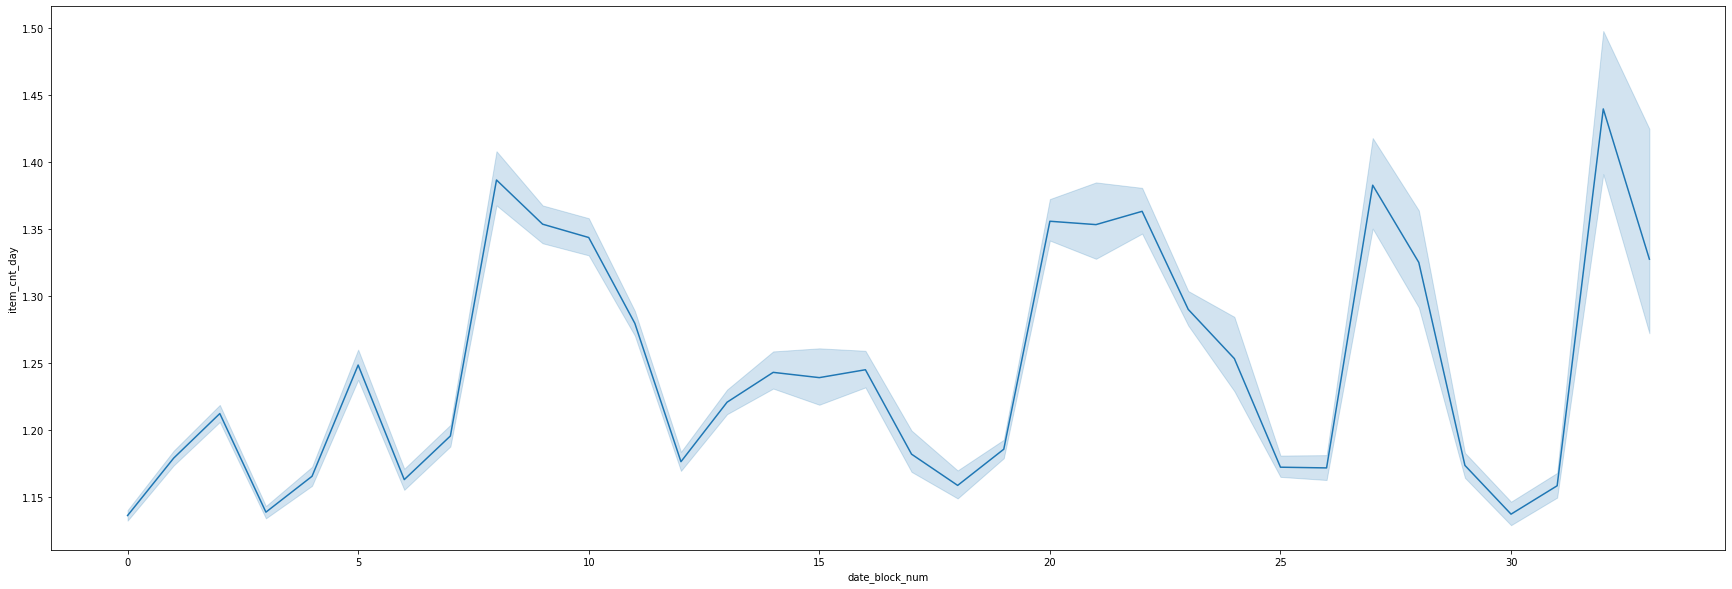

In [ ]:
sns.lineplot(df_train['date_block_num'],y=df_train['item_cnt_day'])


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


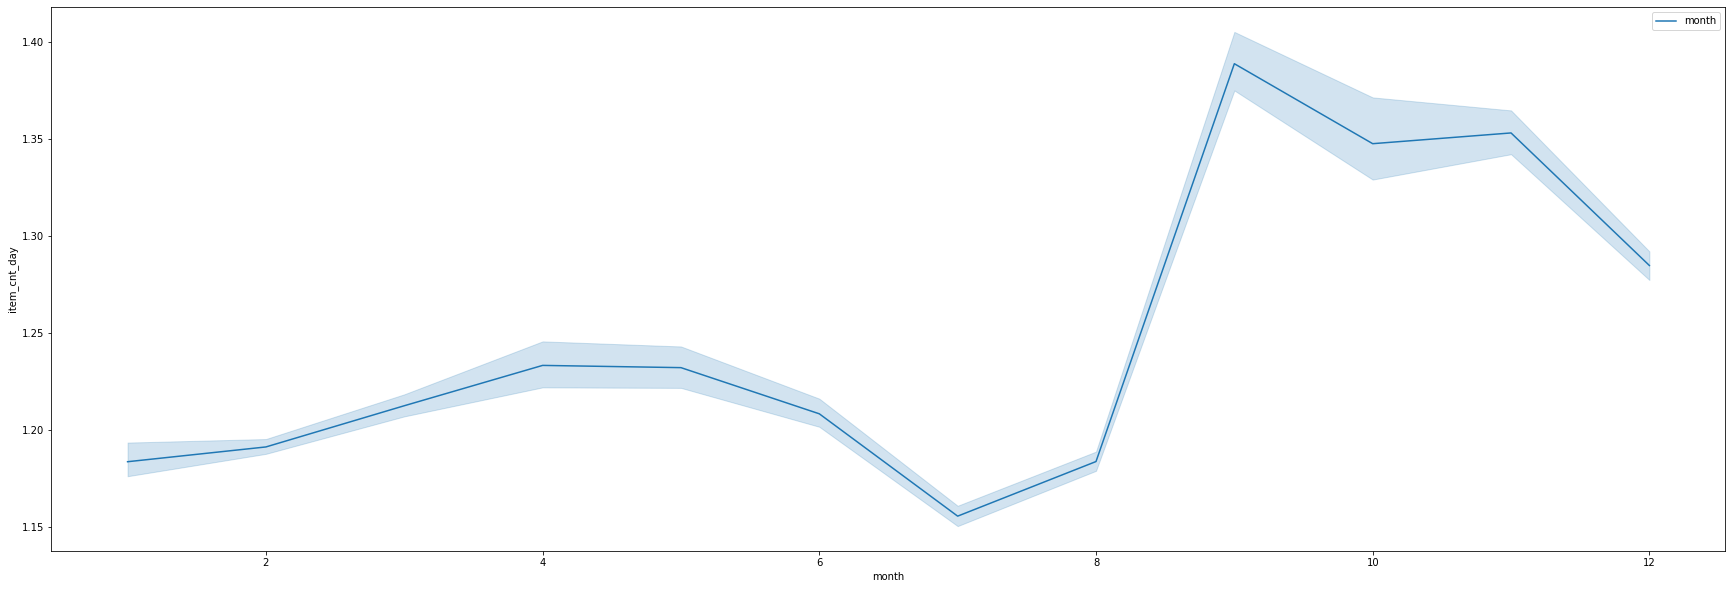

In [ ]:
sns.lineplot(df_train['month'],df_train['item_cnt_day'],label='month')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


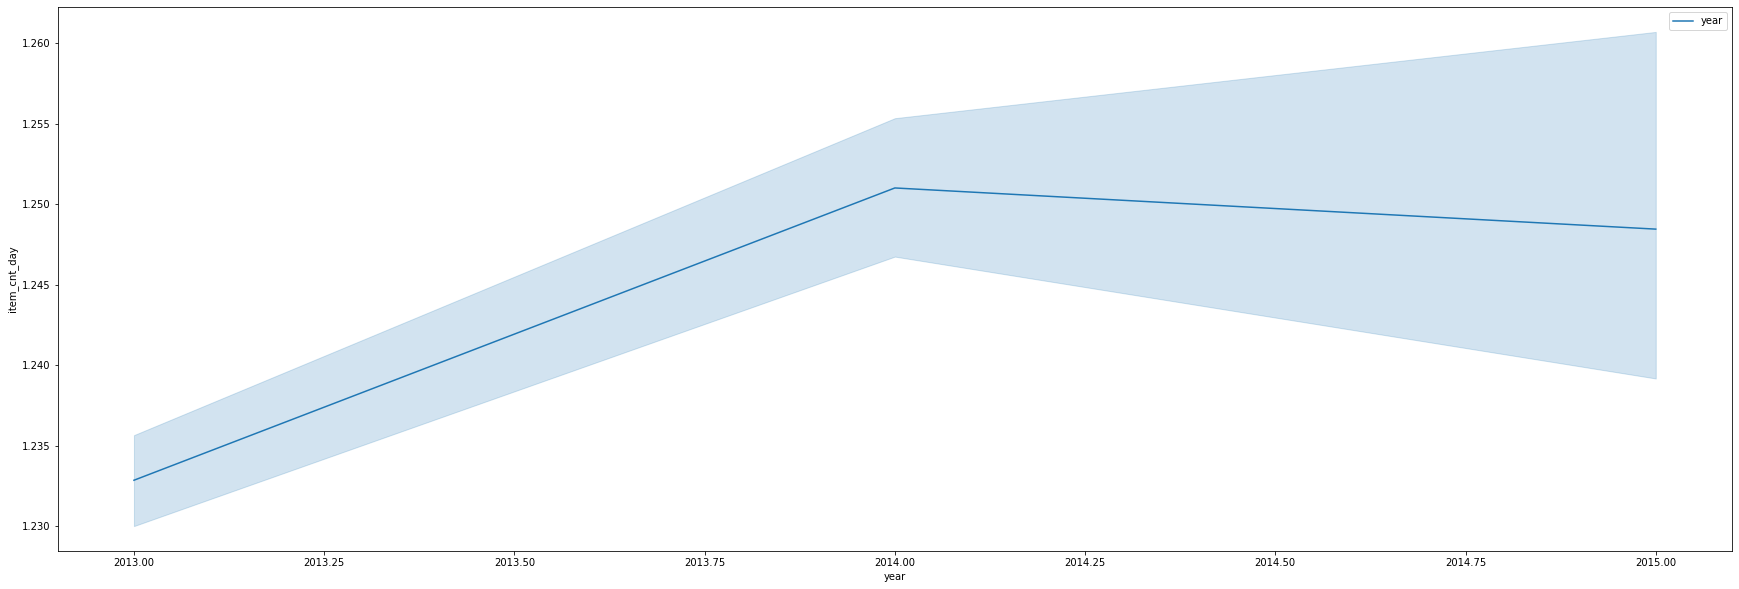

In [ ]:
sns.lineplot(df_train['year'],df_train['item_cnt_day'],label='year')


In [ ]:
df_train=df_train.groupby(['year','month','shop_id','item_id','item_category_id']).agg({'item_price': 'mean', 
                                                                   'item_cnt_day': 'sum'
                                                                  }).reset_index()

In [ ]:
temp=df_train.groupby(['item_category_id']).agg({'item_price': 'mean','item_cnt_day': 'sum'
                                                                  }).reset_index()

                                                          

In [ ]:
df_test=pd.merge(df_test,temp[['item_category_id','item_price']],on='item_category_id')

Merging the dataframe

In [ ]:
merged=pd.concat([df_train,df_test])

## Hot - Label Encoding

In [ ]:
final_df=pd.get_dummies(merged,columns=['item_category_id','shop_id','month'],drop_first=True)


In [ ]:
#final_df.drop(['item_id','item_price'],axis=1,inplace=True)

## Splitting Sequentially

In [ ]:
df_train_final=final_df.iloc[:1609124,:]
df_test_final=final_df.iloc[1609124:,:]

In [ ]:
df_train_final.drop(['ID'],axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
import pandas as pd
from sklearn import preprocessing

x = df_train_final[['item_id','item_price','item_cnt_day']]
min_max_scaler = preprocessing.MinMaxScaler()
df_train_final[['item_id','item_price','item_cnt_day']] = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


NameError: ignored

In [ ]:
X_train=df_train_final.iloc[:1259576,:].drop(['item_cnt_day'],axis=1)
Y_train=df_train_final.iloc[:1259576,:]['item_cnt_day']
X_test= df_train_final.iloc[1259576:,:].drop(['item_cnt_day'],axis=1)
Y_test= df_train_final.iloc[1259576:,:]['item_cnt_day']

## Model Training

In [ ]:


#X_training, X_testing, Y_training,Y_testing = train_test_split(X_train,Y_train ,test_size=0.3, random_state=42,shuffle=True)


In [ ]:
param = {"objective":"reg:squarederror"} 
dtrain = xgb.DMatrix(X_train, Y_train, missing=-99)
dvalid = xgb.DMatrix(X_test, Y_test, missing=-99)

watchlist = [(dtrain, 'train'), (dvalid, 'eval')]
xgb_r = xgb.train(params = param, dtrain = dtrain, evals=watchlist, num_boost_round = 100,early_stopping_rounds=3, verbose_eval=True) 
#pred = np.round(xgb_r.predict(test_dmatrix) )

[0]	train-rmse:0.342213	eval-rmse:0.342654
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 3 rounds.
[1]	train-rmse:0.240248	eval-rmse:0.239809
[2]	train-rmse:0.167959	eval-rmse:0.167938
[3]	train-rmse:0.117396	eval-rmse:0.117646
[4]	train-rmse:0.082278	eval-rmse:0.082461
[5]	train-rmse:0.057604	eval-rmse:0.057841
[6]	train-rmse:0.040333	eval-rmse:0.040643
[7]	train-rmse:0.028314	eval-rmse:0.028633
[8]	train-rmse:0.019859	eval-rmse:0.020287
[9]	train-rmse:0.013994	eval-rmse:0.014533
[10]	train-rmse:0.009925	eval-rmse:0.010604
[11]	train-rmse:0.007109	eval-rmse:0.00798
[12]	train-rmse:0.005204	eval-rmse:0.006305
[13]	train-rmse:0.003935	eval-rmse:0.005275
[14]	train-rmse:0.003129	eval-rmse:0.004678
[15]	train-rmse:0.00265	eval-rmse:0.004345
[16]	train-rmse:0.002374	eval-rmse:0.00417
[17]	train-rmse:0.002216	eval-rmse:0.004076
[18]	train-rmse:0.002135	eval-rmse:0.00402
[19]	train-rmse:0.002092	eval-rmse:0

In [ ]:
param = {"objective":"reg:squarederror"} 
#df_train_final.sample(frac=1)
X_train=df_train_final.drop(['item_cnt_day'],axis=1)
Y_train=df_train_final['item_cnt_day']

train_dmatrix = xg.DMatrix(data = X_train, label = Y_train) 
watchlist = [(train_dmatrix, 'train')]
xgb_r = xg.train(params = param, dtrain = train_dmatrix, evals=watchlist, early_stopping_rounds=5, num_boost_round = 100) 

[0]	train-rmse:7.67541
Will train until train-rmse hasn't improved in 5 rounds.
[1]	train-rmse:7.01193
[2]	train-rmse:6.63397
[3]	train-rmse:6.38014
[4]	train-rmse:6.18978
[5]	train-rmse:6.04732


KeyboardInterrupt: ignored

In [ ]:
df_test_final.head(2)

,shop_id,item_cnt_day,ID,item_category_id_0,item_category_id_1,item_category_id_2,item_category_id_3,item_category_id_4,item_category_id_5,item_category_id_6,item_category_id_7,item_category_id_8,item_category_id_9,item_category_id_10,item_category_id_11,item_category_id_12,item_category_id_13,item_category_id_14,item_category_id_15,item_category_id_16,item_category_id_17,item_category_id_18,item_category_id_19,item_category_id_20,item_category_id_21,item_category_id_22,item_category_id_23,item_category_id_24,item_category_id_25,item_category_id_26,item_category_id_27,item_category_id_28,item_category_id_29,item_category_id_30,item_category_id_31,item_category_id_32,item_category_id_33,item_category_id_34,item_category_id_35,item_category_id_36,...,item_category_id_59,item_category_id_60,item_category_id_61,item_category_id_62,item_category_id_63,item_category_id_64,item_category_id_65,item_category_id_66,item_category_id_67,item_category_id_68,item_category_id_69,item_category_id_70,item_category_id_71,item_category_id_72,item_category_id_73,item_category_id_74,item_category_id_75,item_category_id_76,item_category_id_77,item_category_id_78,item_category_id_79,item_category_id_80,item_category_id_81,item_category_id_82,item_category_id_83,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,year_2013,year_2014,year_2015
0,5,NaN,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,4,NaN,5100.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1


In [ ]:
test_dmatrix=xg.DMatrix(data = df_test_final.drop(['ID','item_cnt_day'],axis=1)) 
pred = np.round(xgb_r.predict(test_dmatrix))

In [ ]:
submission=pd.DataFrame()
submission['ID']=df_test_final['ID'].astype(int)
submission['item_cnt_month']=pred

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


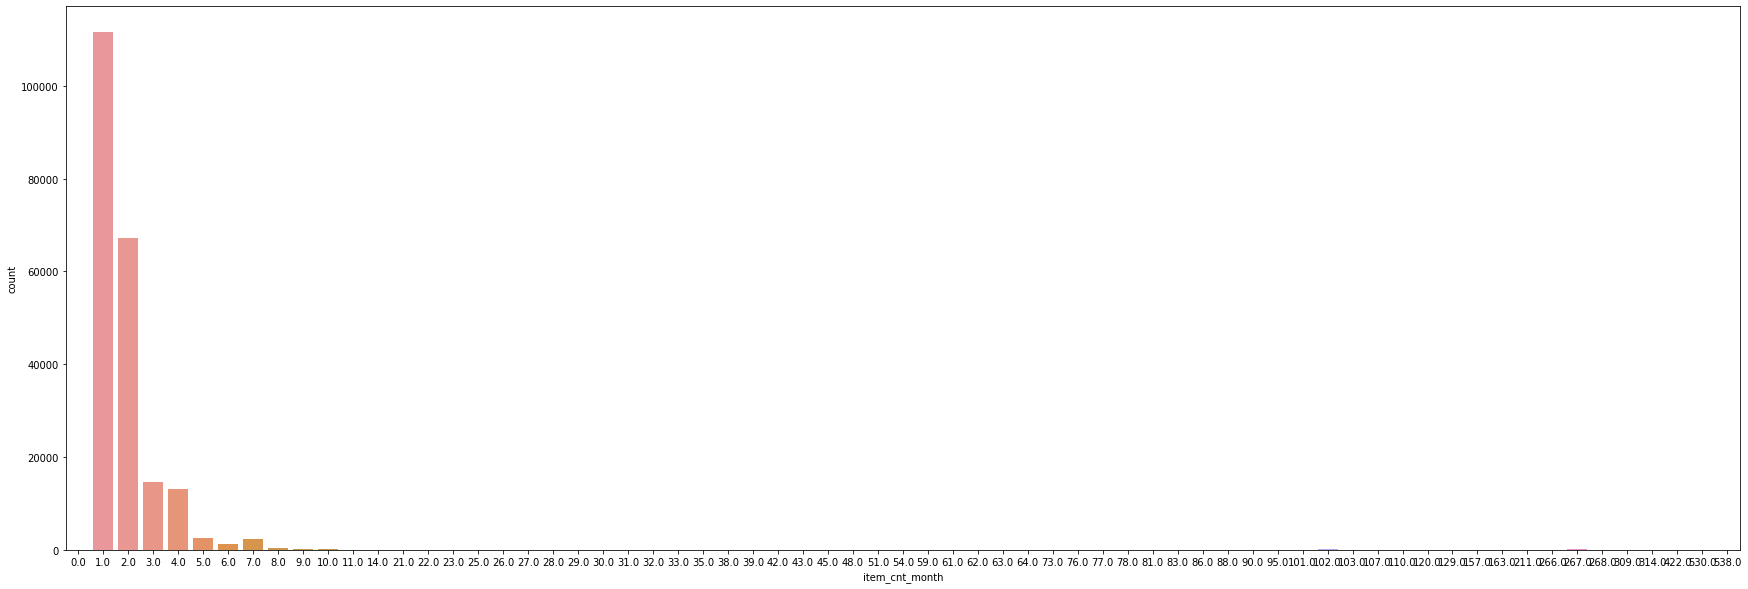

In [ ]:
sns.countplot(submission['item_cnt_month'])

In [ ]:
submission=submission.sort_values('ID')
submission.head(2)

,ID,item_cnt_month
0,0,2.0
42,1,1.0


In [ ]:
submission.to_csv('Round 4 | XGB | Item Cat | Hot encode.csv',index=False)
